In [12]:
#Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.5f' % x) # To supress numerical display in scientific notations

### Read the input data set

In [13]:
cardio = pd.read_csv("CardioGoodFitness.csv")

In [14]:
#show the top 10 rows of the data set
cardio.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
5,TM195,20,Female,14,Partnered,3,3,32973,66
6,TM195,21,Female,14,Partnered,3,3,35247,75
7,TM195,21,Male,13,Single,3,3,32973,85
8,TM195,21,Male,15,Single,5,4,35247,141
9,TM195,21,Female,15,Partnered,2,3,37521,85


In [15]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Observations
1. From the 8 columns, 1 is string type, 2 are categorical and remaining are integers.
2. All columns have values
3. The data occupies 10.6KB of memory space.

# Understanding of the data

#### 1. Overview of the data

In [16]:
#show the number of rows and columns in the input data set.
cardio.shape

(180, 9)

Observation - There are 180 rows and 9 columns in the input data set.

#### 2. Check the data types of each column

In [17]:
#show the data type of each column in the input data set.
cardio.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

Observation
1. Product, Gender and Marital Status are object data types while remaining columns are numerical data types.
2. Gender and marital status can be converted to category data type as they are categorical data types.

In [18]:
#convert gender into categorical data type
cardio.Gender = cardio.Gender.astype('category')

#convert marital status into categorical data type
cardio.MaritalStatus = cardio.MaritalStatus.astype('category')

In [19]:
#now to confirm the change in data types of the columns of the input data set.
cardio.dtypes

Product            object
Age                 int64
Gender           category
Education           int64
MaritalStatus    category
Usage               int64
Fitness             int64
Income              int64
Miles               int64
dtype: object

#### 3. Check for missing values

In [20]:
#Now to check for missing values
cardio.isnull()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
175,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False
177,False,False,False,False,False,False,False,False,False
178,False,False,False,False,False,False,False,False,False


Observation
1. From the above code, it only shows that the first 5 and last 5 rows have no null values.
2. Now I will print rows which have even a single null value to see if the middle rows have null values.


In [21]:
#Check for any column where the value is null
cardio_null = cardio[cardio.isna().any(axis=1)]
#print rows where that column value is null
cardio_null
#output is a blank data frame.

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles


Observation
1. I have got a blank data set after printing rows where even a single value across any column is null.
2. Hence we can safely say that our input data set has no missing value in any row or any column.

#### 4. Statistical summary of the input data set

In [22]:
#using the describle function, we can understanding of each numerical data column.
cardio.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.00000,180.00000,180.00000,180.00000,180.00000,180.00000
mean,28.78889,15.57222,3.45556,3.31111,53719.57778,103.19444
std,6.94350,1.61705,1.08480,0.95887,16506.68423,51.86360
min,18.00000,12.00000,2.00000,1.00000,29562.00000,21.00000
25%,24.00000,14.00000,3.00000,3.00000,44058.75000,66.00000
50%,26.00000,16.00000,3.00000,3.00000,50596.50000,94.00000
75%,33.00000,16.00000,4.00000,4.00000,58668.00000,114.75000
max,50.00000,21.00000,7.00000,5.00000,104581.00000,360.00000


Observations
1. The mean age of all customers buying treadmills is 28.78889. The maximum age of customers is 50 years.
2. The mean years of education our customers have is 15.57222 years while maximum years of education that one has is 21 years.
3. On an average, our customers use the treadmill 3.4 times a week (3-4 times) while the maximum that one has used is all days of the week.
4. The average income of our customers is 53719.5778 while the maximum income among our customers is 104581.00. 
5. The mean miles that our customers run on the treadmill is 103.19 miles and the maximum that one has ran is 360 miles.

# Univariate analysis

#### 1. Study of the age of our customers

<AxesSubplot:xlabel='Age', ylabel='Count'>

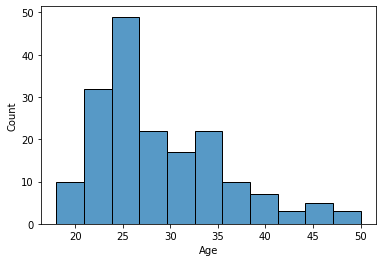

In [23]:
#Histogram of the age of the customers.
sns.histplot(cardio.Age)

Observations
1. The mean age from the above statistics is 28.78889. 
2. The graph shows that most of our customers are young in age. 
3. The graph shows as that as the age of our customers increases, the number of the customers also decreases. 
4. There is a positive skew in our graph.

<AxesSubplot:>

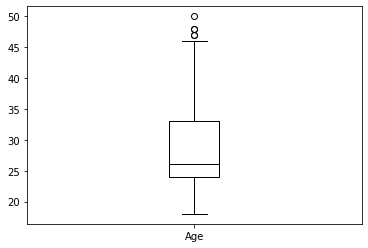

In [24]:
#Boxplot of the age of the customers.
cardio.boxplot(column=['Age'], grid=False, color='black')

Observations
1. The mean age from the above statistics is 28.78889. 
2. There are only a few outliers in our boxplot.

#### 2. Study of the income of our customers

<AxesSubplot:xlabel='Income', ylabel='Count'>

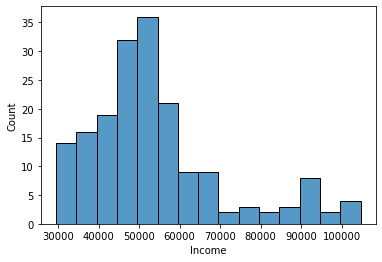

In [26]:
#Histogram of the income of the customers.
sns.histplot(cardio.Income)

Observations
1. The mean income from the above statistics is 53719.57778. 
2. The graph shows that most of our customers earn less than 70000. 
3. The graph shows as that as the income of our customers increases, the number of the customers decreases.
4. There is a positive skew in our graph.

<AxesSubplot:>

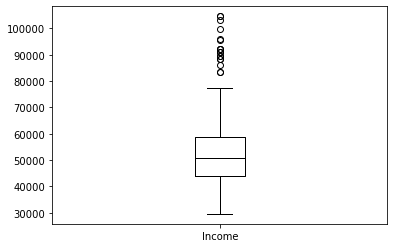

In [27]:
#Boxplot of the income level of the customers.
cardio.boxplot(column=['Income'], grid=False, color='black')

Observations
1. The mean income from the above statistics is 53719.57778. 
2. There are a lot of outliers in our boxplot which are outside the maximum limit (which is Q3+1.5IQR).

#### 3. Study of the education level of our customers

<AxesSubplot:xlabel='Education', ylabel='Count'>

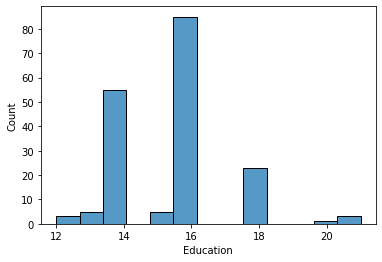

In [28]:
#Histogram of the education level of the customers.
sns.histplot(cardio.Education)

Observations
1. The mean education level from the above statistics is 15.57222. 
2. The graph shows that most of our customers have less than 17 years of education. 
3. The graph shows as that as the number of years of education of our customers increases, the number of the customers decreases. 

<AxesSubplot:>

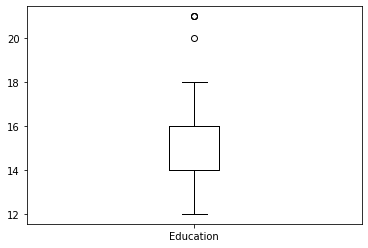

In [29]:
#Boxplot of the education level of the customers.
cardio.boxplot(column=['Education'], grid=False, color='black')

Observations
1. The median and Q3 of the boxplot coincide. 
2. The outliers are around 21, which is also the maximum years of education that our customers have completed.

#### 4. Study of the gender of our customers

<AxesSubplot:xlabel='Gender', ylabel='Count'>

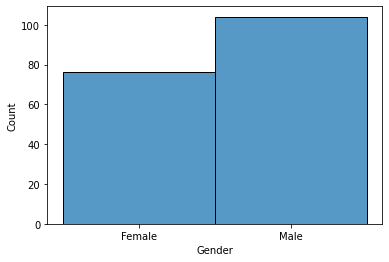

In [30]:
#Histogram to show the number of customers when compared by their gender.
sns.histplot(cardio.Gender)

In [31]:
cardio['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

Observations
1. Out of the 180 customers, 104 are male and 76 are females.

#### 5. Study of the marital status of our customers

<AxesSubplot:xlabel='MaritalStatus', ylabel='Count'>

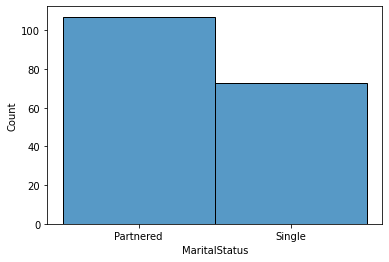

In [32]:
#Histogram to show the number of customers when compared by their marital status.
sns.histplot(cardio.MaritalStatus)

In [33]:
cardio['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

Observations
1. Out of the 180 customers, 107 are partnered and 73 are single.

#### 6. Study of the usage levels of our customers

<AxesSubplot:xlabel='Usage', ylabel='Count'>

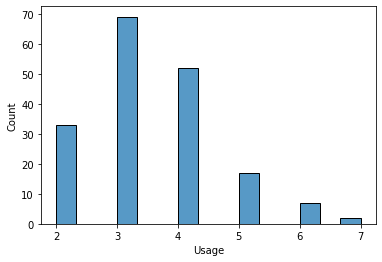

In [34]:
#Histogram to show the usage of the treadmills by our customers.
sns.histplot(cardio.Usage)

Observations
1. The mean usage from the above statistics is 3.45. 
2. The graph shows that most of our customers use the treadmills for 4 or less days a week. 
3. There is a positive skew in our graph.

<AxesSubplot:xlabel='Usage', ylabel='Density'>

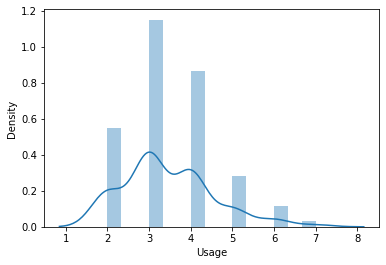

In [35]:
#Distplot to show the usage of the treadmills by our customers.
#Distplot superimposes a frequency polygon on a histogram.
sns.distplot(cardio.Usage)

#### 7. Study of the fitness levels of our customers

<AxesSubplot:xlabel='Fitness', ylabel='Count'>

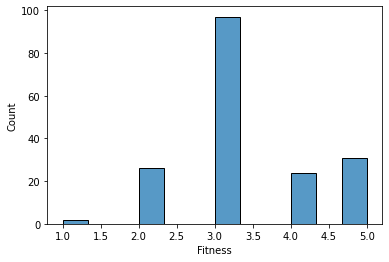

In [36]:
#Histogram to show the fitness score (self) of our customers.
sns.histplot(cardio.Fitness)

<AxesSubplot:xlabel='Fitness', ylabel='Density'>

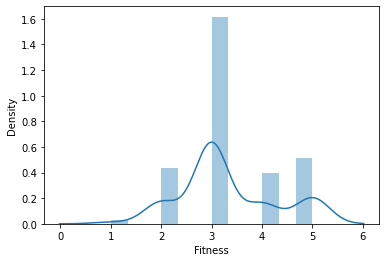

In [37]:
sns.distplot(cardio.Fitness)

Observations
1. The mean usage from the above statistics is 3.1 while the maximum score that any customer has given themselves is 5.0 
2. The graph shows that most of our customers has given themselves a score of 4.0 or less (75%). 
3. There is no skew in our graph.

#### 8. Study of the expected miles that our customers intend to run on the treadmill.

<AxesSubplot:xlabel='Miles', ylabel='Count'>

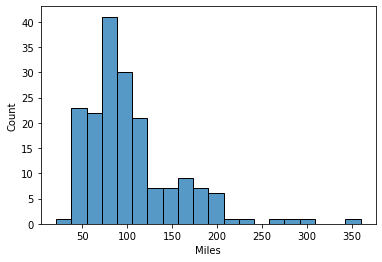

In [38]:
#Histogram to show the expected miles that our customers think they can run.
sns.histplot(cardio.Miles)

<AxesSubplot:>

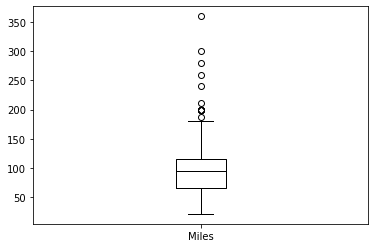

In [39]:
#Boxplot of the expected miles that our customers think they can run.
cardio.boxplot(column=['Miles'], grid=False, color='black')

Observations
1. The mean number of miles that our customers think that they can run is 103.19 miles, while 75% of our customers think they can run 114 miles. 
2. The maximum that a customer thinks that they can run is 360 miles.
3. There is a positive skew in our graph.

#### 9. FacetGrid of age of customers when compared with respect to Gender.

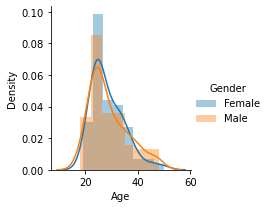

In [40]:
sns.FacetGrid(cardio, hue = 'Gender').map(sns.distplot,'Age').add_legend()

Observation
1. The average age per gender is also the same as the average age of the overall data set.

#### 10. Bar Graph of sale of treadmills by product type.

In [41]:
cardio_groupanalysis = cardio['Product'].value_counts()
cardio_groupanalysis

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

<AxesSubplot:>

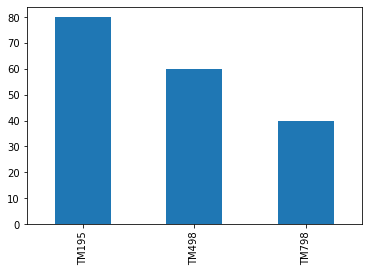

In [42]:
cardio_groupanalysis.plot(kind='bar')

Observation
1. TM195 treadmills are the most preffered type of treadmills that the customers like to purchase.

# Multivariate analysis

#### 1. Use Pairplot to show relationship of each numerical column with other column when compared with respect to gender.

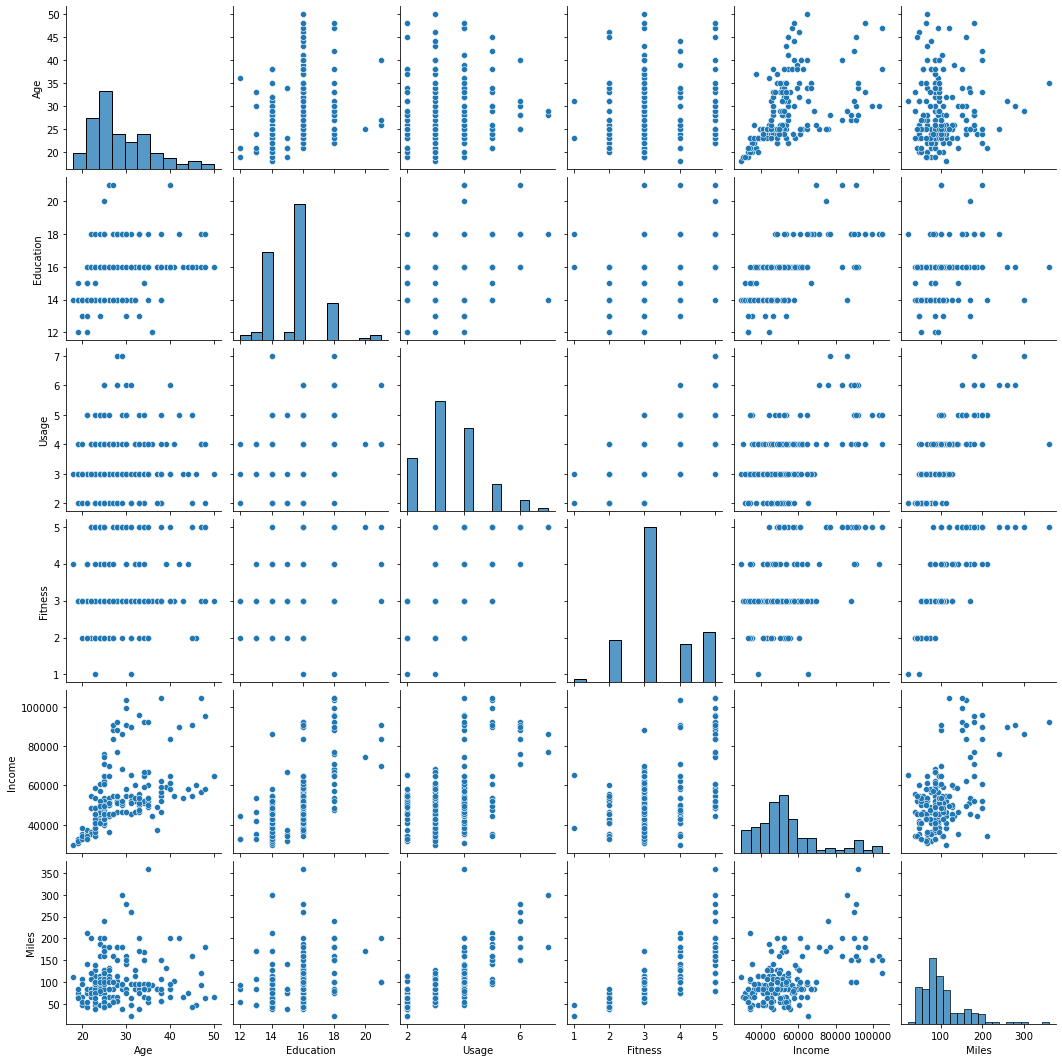

In [43]:
#Create a pairplot on the cardio data frame and display the output.
sns.pairplot(cardio)
plt.show()

Observations:
1. When we see age versus income, as age increases, so does the income.
2. Comparsing miles expected to be ran with age, younger people expect to run more miles and older customers are expecting themselves to run lesser miles. As age is increasing, expected miles to be ran is decreasing.
3. Comparing usage with age, younger people are expected to use the treadmill more frequently than older people in the week.
4. When comparing fitness with miles, customers who are expecting to run more miles are giving themselves a higher fitness score.
5. When comparing age versus education, younger people have lesser years of education.
6. People with lesser income are expecting to run more number of miles.
7. People with higher income are expecting to use the machine less throughout the week.

#### 2. Find correlation among columns to justify above observations

In [44]:
#find correlation among columns
correlation = cardio.corr()
correlation

,Age,Education,Usage,Fitness,Income,Miles
Age,1.00000,0.28050,0.01506,0.06110,0.51341,0.03662
Education,0.28050,1.00000,0.39516,0.41058,0.62583,0.30728
Usage,0.01506,0.39516,1.00000,0.66861,0.51954,0.75913
Fitness,0.06110,0.41058,0.66861,1.00000,0.53501,0.78570
Income,0.51341,0.62583,0.51954,0.53501,1.00000,0.54347
Miles,0.03662,0.30728,0.75913,0.78570,0.54347,1.00000


Observations
1. Fitness and expected miles to be ran are strongly correlated.
2. Actual Usage and expected miles to be ran are also strongly correlated.
3. Fitness and usage are also strongly correlated.
4. Miles to be ran and income are moderately correlated.
5. Age and income are also moderately correlated.
6. Age and number of miles expected to be ran are barely correlated.

#### 3. Heatmap of the correlation among columns


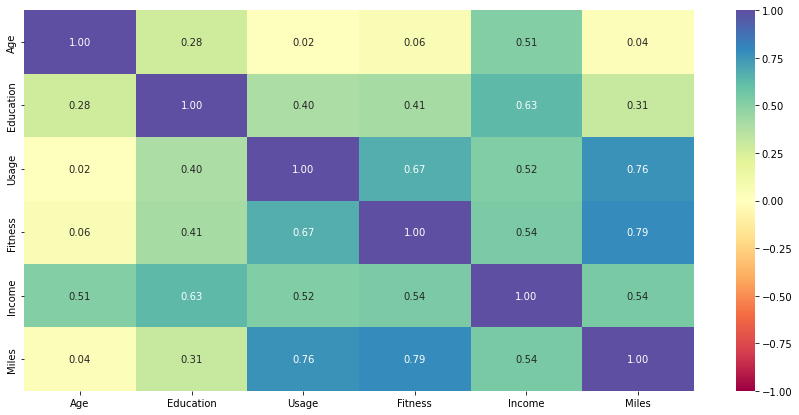

In [45]:
#Here we are drawing a heatmap of the correlation matrix in the previous step and each variable's correlation is shown with corresponding columns
plt.figure(figsize=(15, 7))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, 
            fmt=".2f", cmap="Spectral")
plt.show()

Observations
1. The most strongly correlated columns are: (Usage, Miles), (Fitness,Miles), (Income, Education), (Fitness, Usage).
2. Some columns that are moderately correlated are: (Age, Income), (Usage, Income), (Fitness, Income), (Income, Miles)
3. Except Income, Age is not correlated strongly with any other column

#### 4. Show violin plot of age versus income


<AxesSubplot:xlabel='Age', ylabel='Income'>

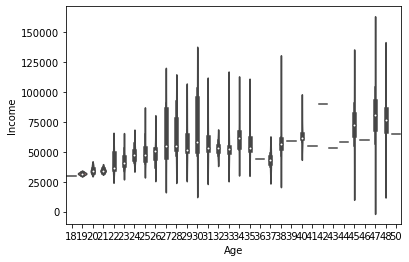

In [46]:
#Violin plot of age versus income
sns.violinplot(x = 'Age', y = 'Income', data = cardio, size = 8)

Observations
1. As age increases, so does the income range.

#### 5. Analysis of sale of treadmill by the product type


In [47]:
#Find count of each type of treadmill sold.
cardio['Product'].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

In [48]:
#Using GroupBy query on Product and Gender and aggregating on the count of number of treadmills sold.
cardio_groupanalysis = cardio.groupby(['Product','Gender']).agg('count')
cardio_groupanalysis

Age  Education  MaritalStatus  Usage  Fitness  Income  Miles
Product Gender                                                              
TM195   Female   40         40             40     40       40      40     40
        Male     40         40             40     40       40      40     40
TM498   Female   29         29             29     29       29      29     29
        Male     31         31             31     31       31      31     31
TM798   Female    7          7              7      7        7       7      7
        Male     33         33             33     33       33      33     33

<AxesSubplot:xlabel='Gender'>

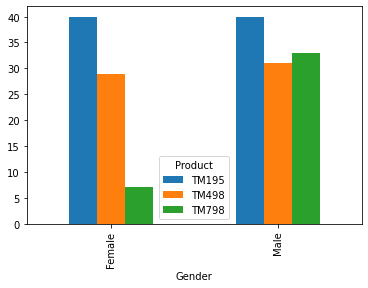

In [49]:
#A crosstab to show the number of treadmills sold per product type based on the gender of the customers.
pd.crosstab(cardio['Gender'],cardio['Product']).plot.bar()

Observations
1. TM195 treadmill is bought equally by male and female customers.
2. TM798 is heavily preferred by male customers over female customers.

#### 6. Analysis of income of customers by their marital status

In [50]:
#Group by marital status and find the average income of each type of marital status.
cardio.groupby(['MaritalStatus']).agg('mean').reset_index()[['MaritalStatus','Income']]

,MaritalStatus,Income
0,Partnered,55763.00000
1,Single,50724.42466


<AxesSubplot:>

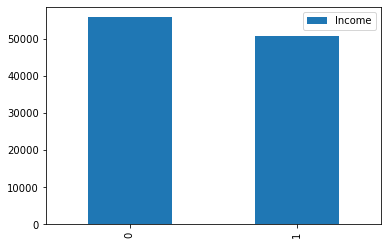

In [51]:
#Bar graph of the above result
cardio.groupby(['MaritalStatus']).agg('mean').reset_index()[['MaritalStatus','Income']].plot(kind='bar')
#0 represents partered marital status and 1 represents single marital status.

Observation
1. Customers whose marital status is "Partnered" have a higher average income than "Single" customers.

#### 7. Analysis of sale of product types of treadmills by customers group by their marital status

In [52]:
#Using GroupBy query on Product and Marital Status and aggregating on the count of number of treadmills sold.
cardio_groupanalysis = cardio.groupby(['Product','MaritalStatus']).agg('count')
cardio_groupanalysis


Age  Gender  Education  Usage  Fitness  Income  Miles
Product MaritalStatus                                                       
TM195   Partnered       48      48         48     48       48      48     48
        Single          32      32         32     32       32      32     32
TM498   Partnered       36      36         36     36       36      36     36
        Single          24      24         24     24       24      24     24
TM798   Partnered       23      23         23     23       23      23     23
        Single          17      17         17     17       17      17     17

<AxesSubplot:xlabel='Product'>

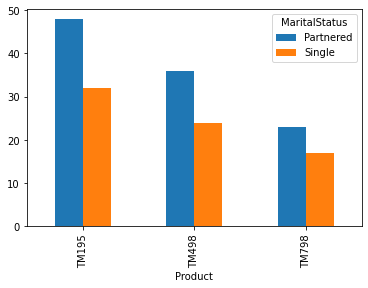

In [53]:
#A crosstab to show the number of treadmills sold per product type based on the marital status of the customers.
pd.crosstab(cardio['Product'],cardio['MaritalStatus']).plot.bar()

Observation
1. Partnered couples prefer to buy TM195 treadmill over other types of treadmills.
2. Single couples also prefer to buy TM195 treadmill over other types of treadmills.

#### 8. Analysis of age versus income of customers with respect to what type of treadmills they like

<AxesSubplot:xlabel='Age', ylabel='Income'>

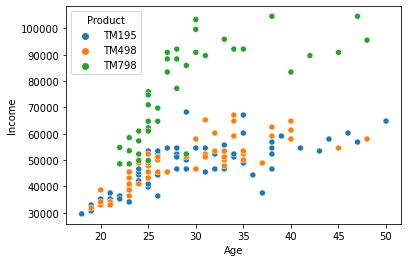

In [54]:
#Using scatter plot for the above analysis
sns.scatterplot(x = "Age", y = "Income", hue = "Product", data = cardio)

Observation
1. People with higher income tend to like product TM 798. Though the count is less, but richer people have a different preference as shown by the graph.
2. People with medium level income but higher age are preferring product TM195.
3. Income is a major factor in selection of product by our customers.

#### 9. Analysis of marital status versus income of customers with respect to what type of treadmills they like

<AxesSubplot:xlabel='MaritalStatus', ylabel='Income'>

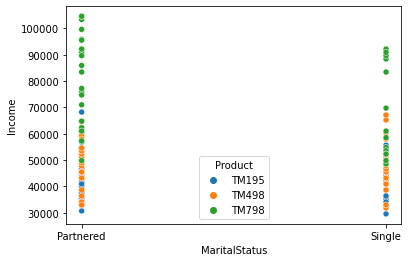

In [55]:
#Using scatter plot for the above analysis
sns.scatterplot(x = "MaritalStatus", y = "Income", hue = "Product", data = cardio)

Observation
1. People with higher income tend to like product TM 798. Though the count is less, but richer people have a different preference as shown by the graph.
2. Partnered folks with lesser income are liking product TM498 and with higher income are liking product TM798.
3. Single folks with least level of income are preferring TM195, with medium income are liking TM498 and with higher income are liking TM798, though their count of choosing TM798 is much lower than that of parterned customers.

# Recommendations and suggestions to the firm

Recommendations:
1. Market product TM195 to lower income and medium aged customers who are single.
2. Market product TM798 to higher income and older aged customers who are male and are parterned.
3. Market product TM498 to medium income and youngest group of customers who are parterned.
4. Market product TM798 more to male customers as they prefer it excessively over female customers.
5. Younger aged customers are expected to use the treadmills more than older aged customers.
6. Income is one of the biggest influencers of the product.